<a href="https://colab.research.google.com/github/aryanrohilla123456/Student-Performance-Predictor-for-EduQuest-Coaching/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score



In [2]:
df = pd.read_csv('/content/Student Performance Predictor for EduQuest Coaching.csv')
df.head()

,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64


In [3]:
print(df.isnull().sum())

gender                            0
age                               0
parental_education                0
family_income                     0
internet_access                   0
previous_exam_score               0
attendance_rate                   0
homework_completion_rate          0
class_participation_score         0
number_of_absences                0
extra_curricular_involvement    372
learning_hours_per_week           0
tutor_support                     0
final_exam_score                  0
dtype: int64


In [4]:
cat_cols = ['gender', 'parental_education', 'internet_access',
            'extra_curricular_involvement', 'tutor_support']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
X = df.drop('final_exam_score', axis=1)
y = df['final_exam_score']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 5.17
R2 Score: 0.69


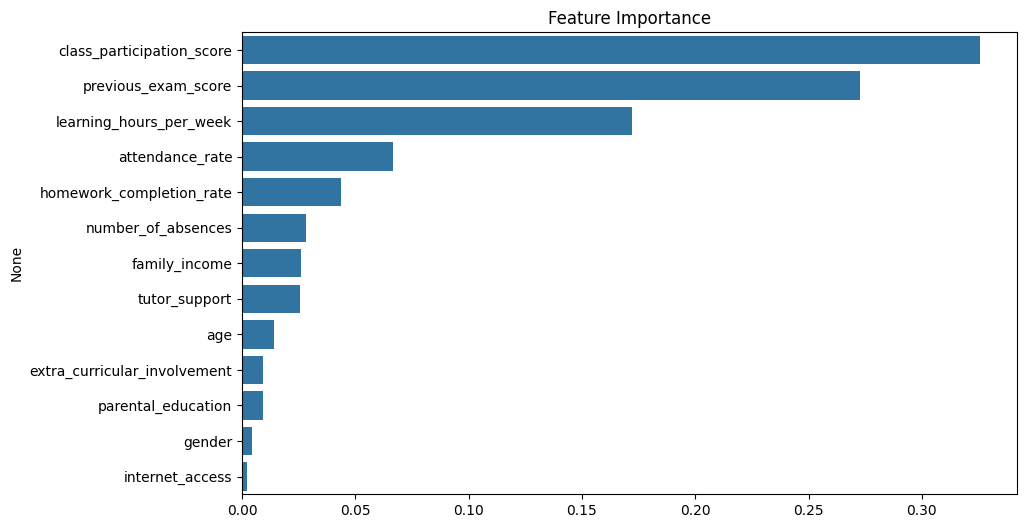

In [10]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.show()


In [11]:
sample = np.array([[1, 16, 2, 40000, 1, 85, 90, 80, 5, 2, 1, 12, 0]])  # Example values
sample_scaled = scaler.transform(sample)
predicted_score = model.predict(sample_scaled)
print(f"Predicted Final Exam Score: {predicted_score[0]:.2f}")


Predicted Final Exam Score: 88.86


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import joblib
joblib.dump(model, 'student_performance_predictor.pkl')

['student_performance_predictor.pkl']